## Project 2020
### GMIT Fundamentals of Data Analysis
***
### Student: Aine Nic Dhonnacha
***
### Email: G00259400@gmit.ie
***

This project performs and explains <b>simple linear regression</b> using Python on the powerproduction dataset below. The goal is to accurately predict wind turbine power output from wind speed values using the data set as a basis.

###### The data set url "https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv"
   The dataset was provided by Lecturer Ian Mc Loughlin on moodle. 

## References
Keeping track of references here and will move to the bottom of the notebook when project is near completion. 

1. [Powerproduction dataset url link](https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv)
2. Ian Mc Loughlin course material
3. [pandas documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html)
4. [investopedia](https://www.investopedia.com/terms/s/standarddeviation.asp)
5. [stats](https://online.stat.psu.edu/stat462/node/91/)
6. [real python](https://realpython.com/linear-regression-in-python/)
7. [towardsdatascience.com](https://towardsdatascience.com/simple-linear-regression-model-using-python-machine-learning-eab7924d18b4)
8. [w3 schools on reshaping arrays](https://www.w3schools.com/python/numpy_array_reshape.asp)
9. [sklearn.linear.model.linearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
10. [towards data science](https://towardsdatascience.com/interpreting-coefficients-in-linear-and-logistic-regression-6ddf1295f6f1)
11. [sklearn.metrics.mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)
12. [w3 schools polynomial regression](https://www.w3schools.com/python/python_ml_polynomial_regression.asp)
13. [machine learning mastery](https://machinelearningmastery.com/implement-simple-linear-regression-scratch-python/)
14. [towards data science](https://towardsdatascience.com/linear-regression-in-python-9a1f5f000606)



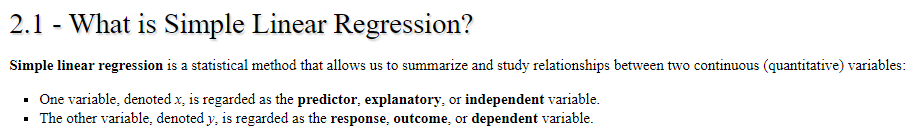
[image from stats.psu](https://online.stat.psu.edu/stat462/node/91/)




 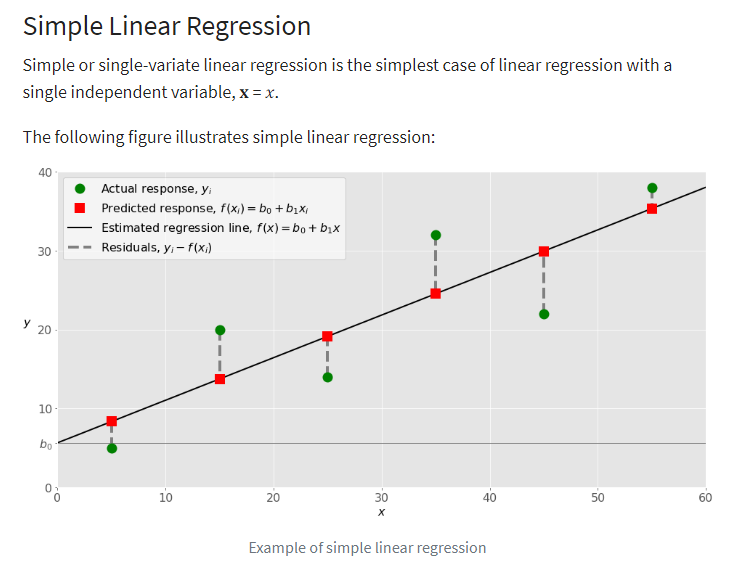[ image from real python](https://realpython.com/linear-regression-in-python/)

<div class="alert alert-success">
  <strong>Explanation of image from real python: </strong> "When implementing simple linear regression, you typically start with a given set of input-output (𝑥-𝑦) pairs (green circles). These pairs are your observations. For example, the leftmost observation (green circle) has the input 𝑥 = 5 and the actual output (response) 𝑦 = 5. The next one has 𝑥 = 15 and 𝑦 = 20, and so on.

The estimated regression function (black line) has the equation 𝑓(𝑥) = 𝑏₀ + 𝑏₁𝑥. Your goal is to calculate the optimal values of the predicted weights 𝑏₀ and 𝑏₁ that minimize SSR and determine the estimated regression function. The value of 𝑏₀, also called the intercept, shows the point where the estimated regression line crosses the 𝑦 axis. It is the value of the estimated response 𝑓(𝑥) for 𝑥 = 0. The value of 𝑏₁ determines the slope of the estimated regression line.

The predicted responses (red squares) are the points on the regression line that correspond to the input values. For example, for the input 𝑥 = 5, the predicted response is 𝑓(5) = 8.33 (represented with the leftmost red square).

The residuals (vertical dashed gray lines) can be calculated as 𝑦ᵢ - 𝑓(𝐱ᵢ) = 𝑦ᵢ - 𝑏₀ - 𝑏₁𝑥ᵢ for 𝑖 = 1, …, 𝑛. They are the distances between the green circles and red squares. When you implement linear regression, you are actually trying to minimize these distances and make the red squares as close to the predefined green circles as possible." </div> 

[real python](https://realpython.com/linear-regression-in-python/)

SSR is the additional amount of explained variability in Y due to the regression model compared to the baseline model

In [1]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (16,8)
import numpy as np

#importing libraries for regression 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import math


In [2]:
# read the dataset url:
import pandas as pd
url ="https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv"
#defining dataset
df = pd.read_csv(url)


In [3]:
# Having a look at the dataset
df

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
...,...,...
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0


Pandas has many built in functions that can assist in analysing dataframes such as those used below; 
[pandas documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   speed   500 non-null    float64
 1   power   500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [5]:
# find the mean
df.mean()


speed    12.590398
power    48.014584
dtype: float64

In [6]:
# for more detail, describe the data set
df.describe()


,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


The Std (standard deviation) and the 50% gives an indiction how far away your values were from the mean.  If the data points are further from the mean, there is a higher deviation within the data set; the more spread out the data, the higher the standard deviation. [investopedia](https://www.investopedia.com/terms/s/standarddeviation.asp)

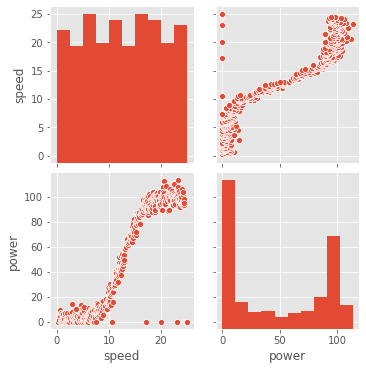

In [31]:
# pairplot of dataset using seaborn
sns.pairplot(df);

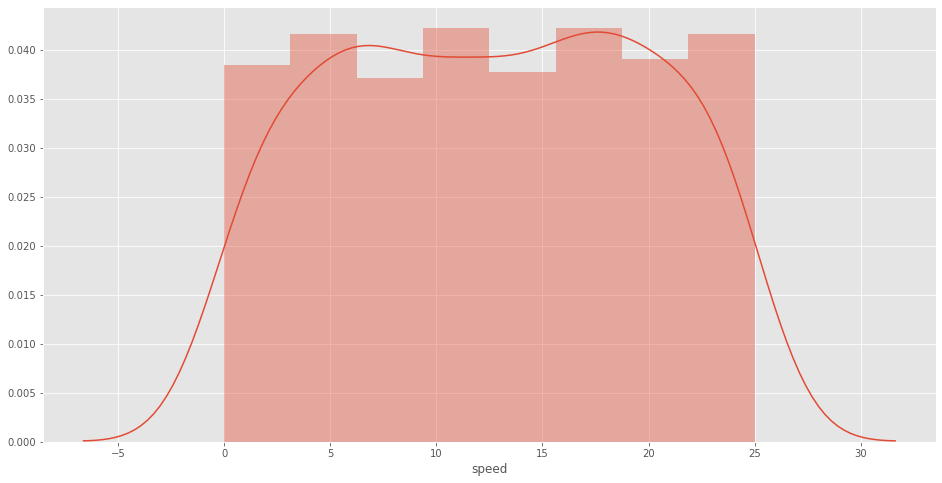

In [33]:
# speed distplot
sns.distplot(df["speed"], kde=True);

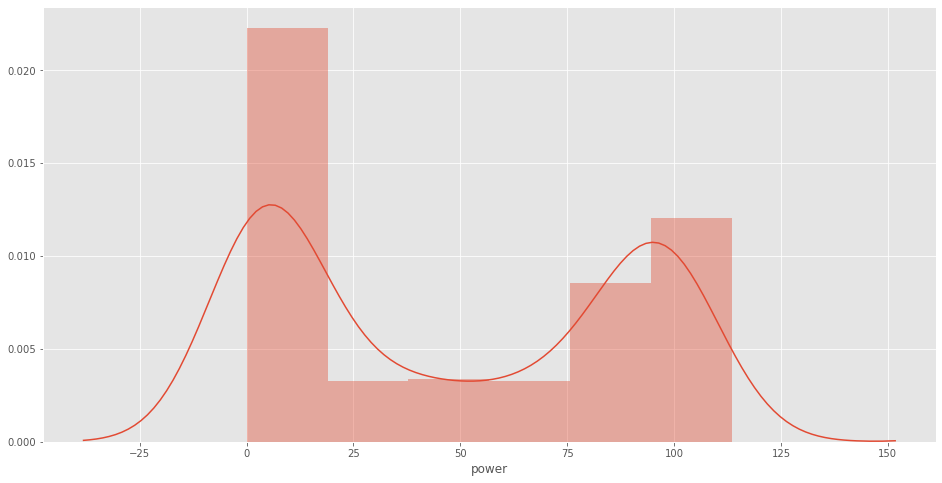

In [29]:
# power distplot
sns.distplot(df["power"], kde=True);

[seaborn.scarrerplot](https://seaborn.pydata.org/generated/seaborn.scatterplot.html) Draws a scatter plot with possibility of several semantic groupings.

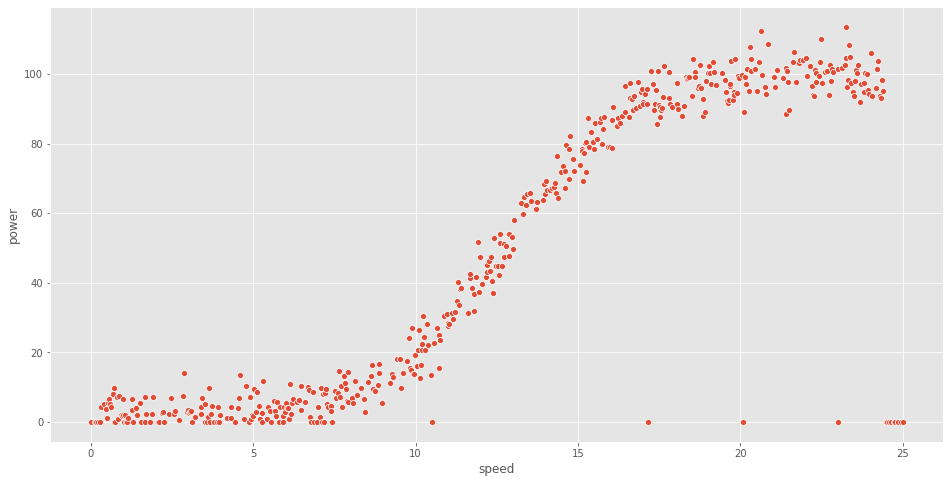

In [10]:
#scatterplot of data using seaborn
sns.scatterplot(data=df, x="speed", y="power");

[seaborn.regplot](https://seaborn.pydata.org/generated/seaborn.regplot.html) Plots data and a linear regression model fit.

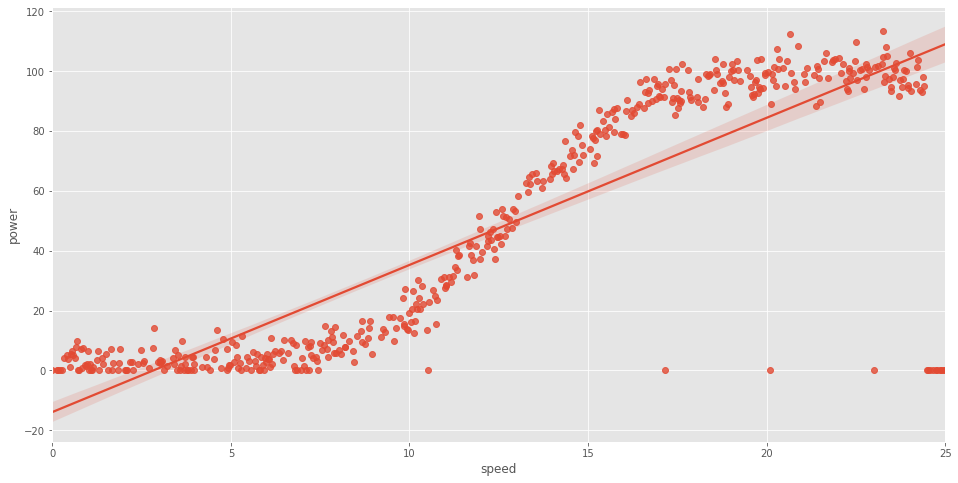

In [28]:
# Scatter and fit line
sns.regplot(x="speed", y="power", data=df);


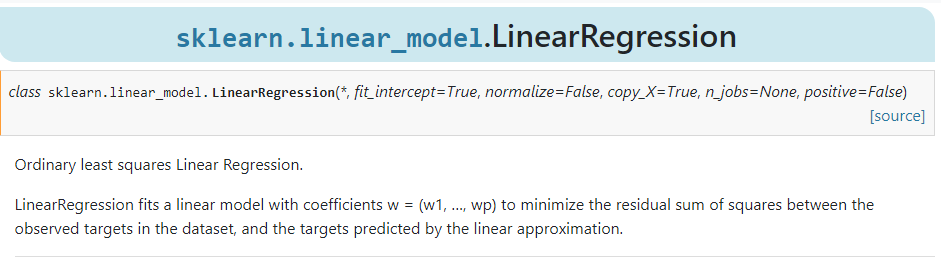

[image from sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

[sklearn.linear.model.linearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) can be used to perform linear and polynomial regression and make predictions.

"The inputs (regressors, x) and output (predictor, 𝑦) should be arrays (the instances of the class numpy.ndarray) or similar objects." [real python](https://realpython.com/linear-regression-in-python/)
 
speed(x)is our regressor, power(y) is our predictor.
 

The array needs to be reshaped because the indexes are not required, just the actual values. we want one column 1 and the -1 means python is going to figure out the value. [w3schools](https://www.w3schools.com/python/numpy_array_reshape.asp)

In [14]:
#selects the column headings in this case 'speed' and 'power'
speed = df['speed']
power = df['power']

#Numpy can be used to create arrays from dataFrames.
# passing -1 as the value, and numpy will calculate the value of the reshape(w3 schools reference above)
x = np.array(speed).reshape(-1, 1)
y = np.array(power).reshape(-1, 1)


In [15]:
#display x
x

array([[ 0.   ],
       [ 0.125],
       [ 0.15 ],
       [ 0.225],
       [ 0.275],
       [ 0.325],
       [ 0.4  ],
       [ 0.45 ],
       [ 0.501],
       [ 0.526],
       [ 0.551],
       [ 0.576],
       [ 0.626],
       [ 0.676],
       [ 0.701],
       [ 0.726],
       [ 0.751],
       [ 0.801],
       [ 0.826],
       [ 0.851],
       [ 0.926],
       [ 0.951],
       [ 0.976],
       [ 1.001],
       [ 1.026],
       [ 1.051],
       [ 1.076],
       [ 1.101],
       [ 1.151],
       [ 1.251],
       [ 1.276],
       [ 1.301],
       [ 1.401],
       [ 1.426],
       [ 1.502],
       [ 1.552],
       [ 1.652],
       [ 1.677],
       [ 1.702],
       [ 1.827],
       [ 1.877],
       [ 1.902],
       [ 2.027],
       [ 2.077],
       [ 2.102],
       [ 2.177],
       [ 2.227],
       [ 2.252],
       [ 2.402],
       [ 2.477],
       [ 2.553],
       [ 2.578],
       [ 2.703],
       [ 2.828],
       [ 2.853],
       [ 2.953],
       [ 3.003],
       [ 3.028],
       [ 3.053

In [16]:
#display y
y

array([[0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [4.33100e+00],
       [5.18600e+00],
       [3.82600e+00],
       [1.04800e+00],
       [5.55300e+00],
       [6.49800e+00],
       [5.24100e+00],
       [4.22000e+00],
       [7.97400e+00],
       [9.74600e+00],
       [0.00000e+00],
       [0.00000e+00],
       [7.27100e+00],
       [7.95000e-01],
       [7.35000e+00],
       [1.99600e+00],
       [1.60900e+00],
       [2.06400e+00],
       [6.51100e+00],
       [0.00000e+00],
       [2.08500e+00],
       [0.00000e+00],
       [1.21000e-01],
       [1.20800e+00],
       [3.37300e+00],
       [6.51000e+00],
       [0.00000e+00],
       [4.15600e+00],
       [2.00500e+00],
       [5.35200e+00],
       [0.00000e+00],
       [7.22100e+00],
       [0.00000e+00],
       [2.43900e+00],
       [0.00000e+00],
       [2.35900e+00],
       [7.04800e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [2.

[real python](https://realpython.com/linear-regression-in-python/)

In [21]:
# creates the variable model as the instance of LinearRegression. 
#.fit() calculates the optimal values of the weights using the existing input and output(x and y) as the arguments. 
model = LinearRegression().fit(x, y)
#R measures how strong of a linear relationship between the two variables
r = model.score(x, y)
print('R squared value:', r)

R squared value: 0.7289360258564073


 The line for a simple linear regression model can be written as:   <div class="well well-sm">y = b0 + b1 * x</div> [machine learning mastery](https://machinelearningmastery.com/implement-simple-linear-regression-scratch-python/) 
 where b0 and b1 are the coefficients we must estimate from the training data

".intercept_ is a one-dimensional array with the single element 𝑏₀, and .coef_ is a two-dimensional array with the single element 𝑏₁."[real python](https://realpython.com/linear-regression-in-python/)

In [36]:
#this is the b0 
print(model.intercept_[0])
#this is the b1
print(model.coef_[0])


-13.899902630519634
[4.91759567]


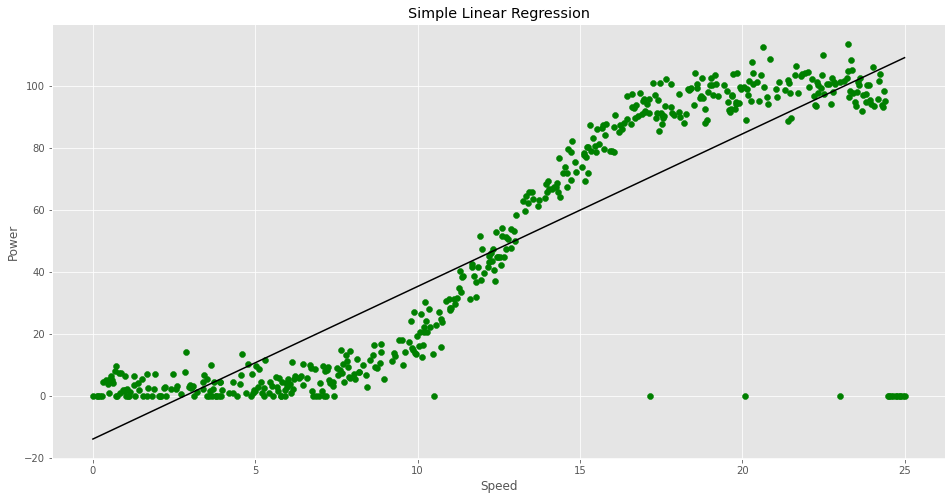

In [37]:
#visualise the dataset with the fitted model
plt.scatter(x, y,color='green' )
plt.plot(x, model.predict(x), color = 'black')
plt.title("Simple Linear Regression")
plt.xlabel("Speed")
plt.ylabel("Power")
plt.show()